# Analyzing Beyond Good and Evil By Friedrich Nietzsche using NLP

In [58]:
import fitz 

# Open the PDF file
pdf_file = "BeyondGoodAndEvil.pdf"
doc = fitz.open(pdf_file)

# Initialize an empty string to store the text
text = ""

# Iterate over all pages and extract the text
for page_num in range(doc.page_count):
    page = doc.load_page(page_num)
    text += page.get_text()

# Optionally, save the extracted text to a text file
with open("Beyond_Good_and_Evil.txt", "w", encoding="utf-8") as f:
    f.write(text)

print(f"Text extracted from the PDF, total characters: {len(text)}")


Text extracted from the PDF, total characters: 372146


In [59]:
import re

def clean_text(text):
    # Remove unwanted characters (non-text or metadata)
    text = re.sub(r"\*\*\*.*\*\*\*", "", text)  # Removes Project Gutenberg metadata if any
    text = re.sub(r"\n+", " ", text)  # Replace multiple newlines with a single space
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = text.strip()  # Remove leading/trailing spaces
    return text

cleaned_text = clean_text(text)
print(f"Cleaned text length: {len(cleaned_text)} characters")


Cleaned text length: 366626 characters


In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 

# Tokenize the cleaned text
tokens = word_tokenize(cleaned_text)

# Lemmatize the tokens and remove stopwords
# Lemmatize the tokens and remove stopwords
tokens_cleaned = [
    lemmatizer.lemmatize(word.lower())
    for word in tokens
    if word.isalpha() and word.lower() not in stop_words and len(word) > 1
]

# Final pass to ensure 'u' and similar tokens are removed
tokens_cleaned = [word for word in tokens_cleaned if word not in {"u"}]

print(f"First 30 tokens: {tokens_cleaned[:30]}")



[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/mac/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


First 30 tokens: ['beyond', 'good', 'evil', 'friedrich', 'nietzsche', 'part', 'one', 'prejudice', 'philosopher', 'truth', 'still', 'tempt', 'many', 'venture', 'famous', 'truthfulness', 'philosopher', 'far', 'spoken', 'respect', 'question', 'truth', 'laid', 'strange', 'wicked', 'questionable', 'question', 'long', 'story', 'even']


In [61]:
import gensim
from gensim import corpora

# Prepare the text data (tokens_cleaned must not be empty)
if len(tokens_cleaned) == 0:
    print("Error: Token list is empty.")
else:
    texts = [tokens_cleaned]  # Ideally split into multiple sections

    # Create dictionary and filter out extremely rare/common terms
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Check dictionary size
    print(f"Dictionary size: {len(dictionary)} unique tokens")
    
    # Ensure there are terms left in the dictionary
    if len(dictionary) == 0:
        print("Error: No terms left in the dictionary after filtering.")
    else:
        # Convert to bag-of-words format
        corpus = [dictionary.doc2bow(text) for text in texts]

        # Check corpus to ensure it has valid data
        print(f"Corpus: {corpus}")

        # Apply LDA with adjusted parameters using LdaModel for auto alpha/eta
        lda = gensim.models.LdaModel(
            corpus, 
            num_topics=5, 
            id2word=dictionary, 
            passes=20, 
            iterations=300, 
            alpha='auto', 
            eta='auto'
        )

        # Display topics
        for idx, topic in lda.print_topics(-1):
            print(f"Topic {idx}: {topic}")


Dictionary size: 0 unique tokens
Error: No terms left in the dictionary after filtering.


In [62]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of the whole text
sentiment_score = sia.polarity_scores(cleaned_text)
print(f"Sentiment analysis: {sentiment_score}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis: {'neg': 0.11, 'neu': 0.742, 'pos': 0.148, 'compound': 1.0}


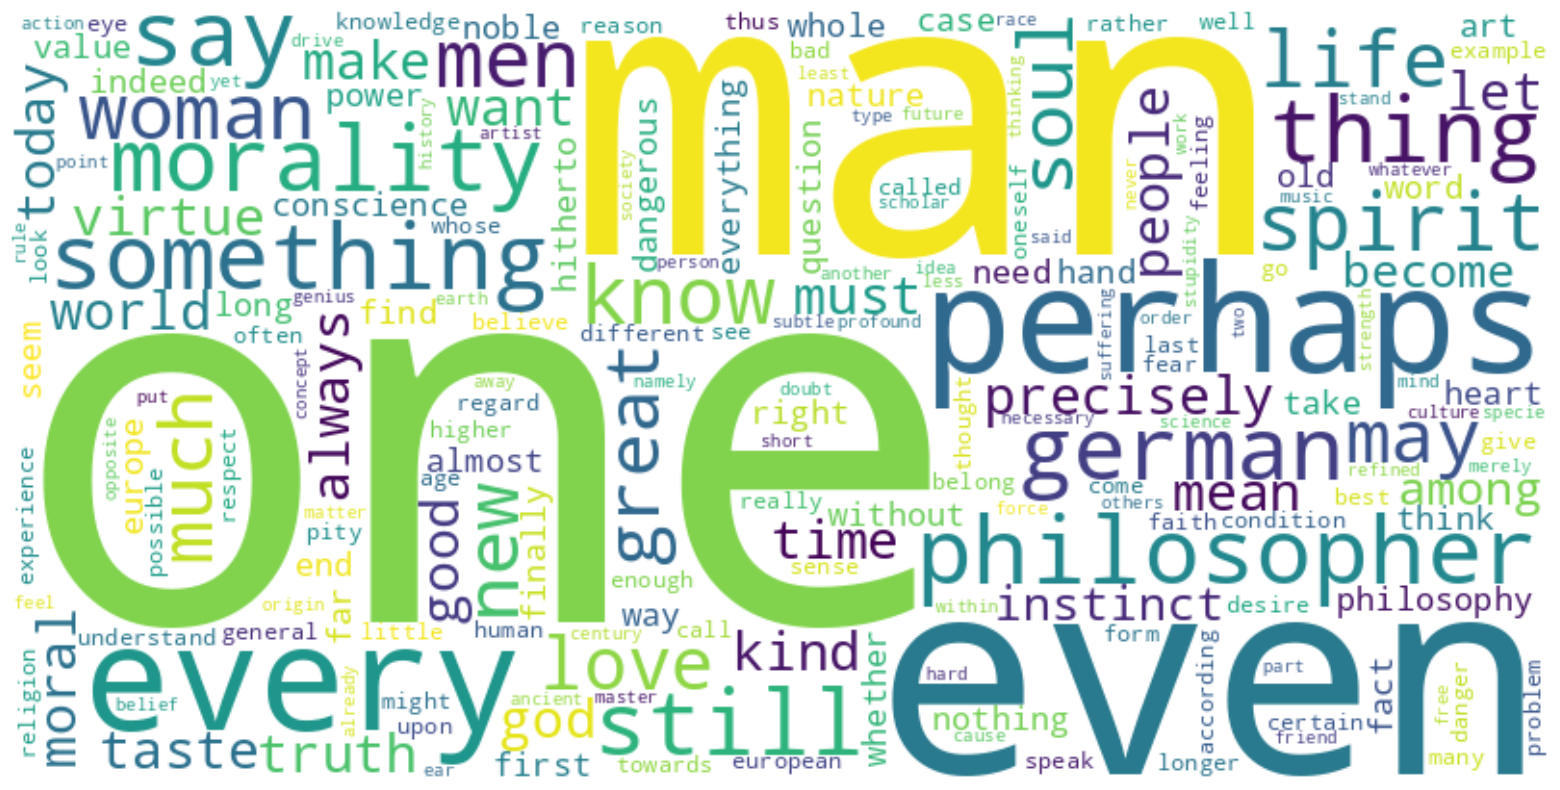

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud from the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_cleaned))

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
